In [ ]:
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn

In [ ]:
# 1. Make classification data

n_sample = 1000
X, y = make_circles(n_sample,
                    noise=0.05,
                    random_state=42)

print(len(X), len(y))
print(f'X: {X[:5]}')
print(f'y: {y[:5]}')

1000 1000
X: [[ 0.74220688  0.24668576]
 [-0.7340323   0.16869164]
 [-0.82985872  0.22195899]
 [-0.42913559  0.67223019]
 [ 0.44560223 -0.89493556]]
y: [1 1 1 1 0]


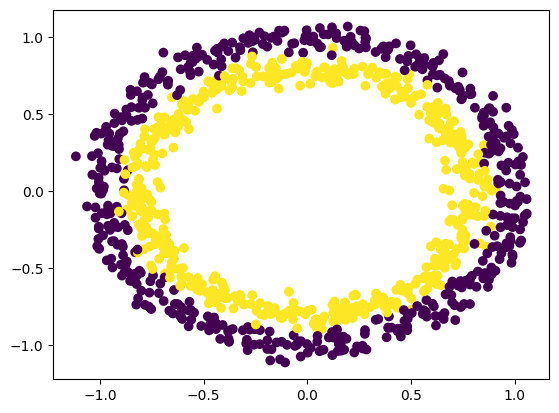

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})

circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


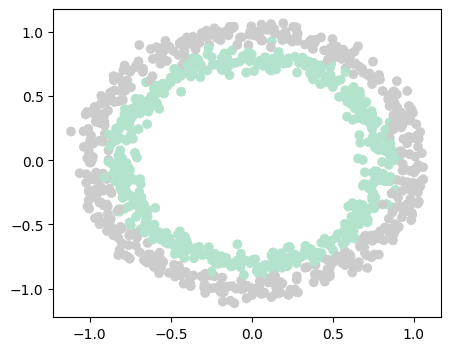

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Pastel2_r')

In [ ]:
# View first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"X: {X_sample}, label: {y_sample}")
print(f'Shape of one sample: {X_sample.shape}, y: {y_sample.shape}')

X: [0.74220688 0.24668576], label: 1
Shape of one sample: (2,), y: ()


In [ ]:
# Convert to tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7422,  0.2467],
         [-0.7340,  0.1687],
         [-0.8299,  0.2220],
         [-0.4291,  0.6722],
         [ 0.4456, -0.8949]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_label = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(800, 200)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class CircleClassificationModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5, bias=True),
        #nn.ReLU(),
        nn.Linear(in_features=5, out_features=1, bias=True),
        #nn.Sigmoid()
    )

  def forward(self, x: torch.Tensor):
    return self.layers(x)

model_0 = CircleClassificationModel()
model_0.to(device)

CircleClassificationModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
model_0

CircleClassificationModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [ ]:
model_0.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 0.3819,  0.6792],
                      [ 0.0425, -0.4504],
                      [ 0.6690, -0.0661],
                      [ 0.2962,  0.0521],
                      [ 0.3303,  0.1534]])),
             ('layers.0.bias',
              tensor([-0.6661,  0.1247, -0.2935,  0.4520, -0.5254])),
             ('layers.1.weight',
              tensor([[ 0.1986,  0.3572, -0.3992, -0.3775, -0.3331]])),
             ('layers.1.bias', tensor([-0.3700]))])

In [ ]:
model_0 = CircleClassificationModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.2)

In [ ]:
def accuracy_fn(y_preds, y_test):
  map_label = torch.round(y_preds)
  correct_pred = torch.count_nonzero(map_label == y_test)
  return (correct_pred / y_test.shape[0]) * 100

In [ ]:
a, b = 0.7, 0.3
bias = 0.4

X = torch.rand((1000, 2), dtype=torch.float)
y = X[:, 0] * a + X[:, 1] * b + bias

X_train, X_test, y_train, y_label = train_test_split(X, y,shuffle=True, test_size=0.2 )

In [ ]:
torch.manual_seed(42)

epochs = 1000
epoch_count = []
loss_train_l = []
loss_test_l = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_label = X_test.to(device), y_label.to(device)

for epoch in range(epochs):
  model_0.train()
  preds = model_0(X_train).squeeze()
  loss_train = loss_fn(preds, y_train)

  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

  if epoch % 10 == 0:
    model_0.eval()
    with torch.inference_mode():
      preds_test = model_0(X_test).squeeze()
      loss_test = loss_fn(preds_test, y_label)

    loss_test_l.append(loss_test)
    acc_test = accuracy_fn(torch.sigmoid(preds_test), y_label)
    loss_train_l.append(loss_train.detach())
    acc_train = accuracy_fn(torch.sigmoid(preds), y_train)

    print(f'Epoch {epoch} | Acc train {acc_train:.4f} | Loss train {loss_train:.3f} | Acc test {acc_test:.4f} | Loss test {loss_test:.3f}')


In [ ]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functionss.py already exists, skipping download')
else:
  print('download code github')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

download code github


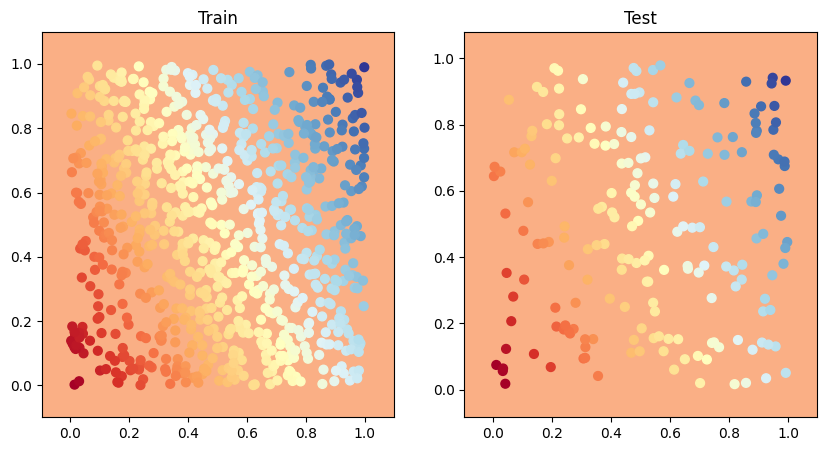

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, preds.detach())

plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, preds_test)

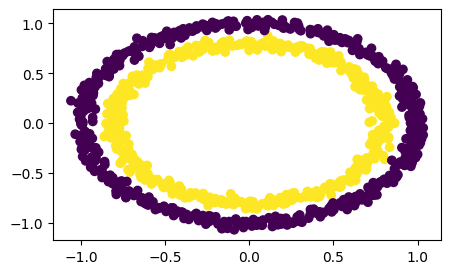

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd

X, y = make_circles(1000, noise=0.03, random_state=42)

plt.figure(figsize=(5, 3))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

df = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'label': y
})

df.head(5)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split

X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
y_train, y_test = y_train.unsqueeze(1), y_test.unsqueeze(1)

In [ ]:
class CircleClassificationModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
model_3 = CircleClassificationModelV2()
model_3.to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [ ]:
epoch = 1000
loss_train_l = []
loss_test_l = []
epoch_count  =[]

for epoch in range(epochs):
  model_3.train()
  preds_train = model_3(X_train)
  loss_train = loss_fn(preds_train, y_train)

  optimizer.zero_grad()
  loss_train.backward()
  optimizer.step()

  if epoch % 10 == 0:
    model_3.eval()
    with torch.inference_mode():
      preds_test = model_3(X_test)

    loss_test = loss_fn(preds_test, y_test)
    loss_train_l.append(loss_train)
    loss_test_l.append(loss_test)
    epoch_count.append(epoch)

    print(f'Epoch: {epoch} | Acc train: {acc_fn(preds_train, y_train):.3f}| Loss train: {loss_train:.3f} | Loss test: {loss_test:.3f} | Acc test: {acc_fn(preds_test, y_test):.3f}')

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test)))

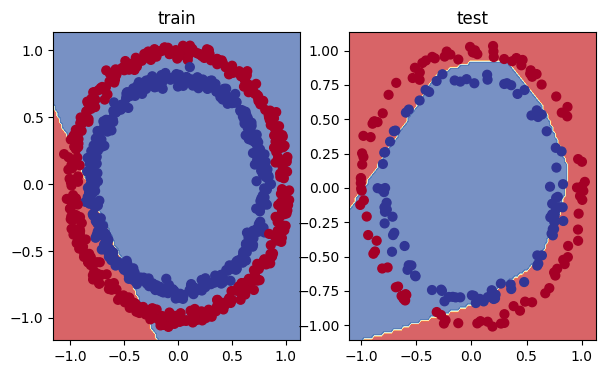

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(1, 2, 1)
plt.title('train')
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title('test')
plot_decision_boundary(model_3, X_test, y_test)

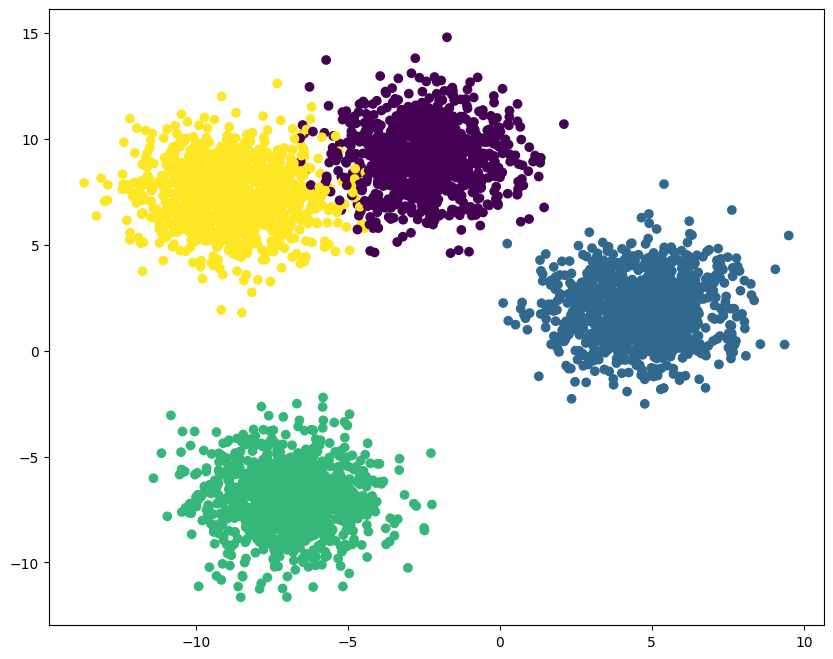

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=4000, n_features=NUM_FEATURES, centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob, y_blob = torch.from_numpy(X_blob).type(torch.float), torch.from_numpy(y_blob).type(torch.LongTensor)

X_train, X_test, y_train, y_test = train_test_split(X_blob,
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

plt.figure(figsize=(10, 8))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class BlobsClassficationModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input features (int): Number of input features to the model.
      output features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:

    """
    super().__init__()
    self.linear_layers_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layers_stack(x)

model_4 = BlobsClassficationModel(2, 4)
model_4.to(device)
model_4


BlobsClassficationModel(
  (linear_layers_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
def acc_fn(preds_relu, labels):
  maps = preds_relu.argmax(dim=1)
  count = torch.count_nonzero(maps == labels)
  return count / len(labels)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
loss_train_l = []
loss_test_l = []
epoch_count = []

for epoch in range(epochs):
  model_4.train()
  preds_logits = model_4(X_train)
  preds = torch.softmax(preds_logits, dim=1)
  loss = loss_fn(preds, y_train)

  acc_train = acc_fn(preds, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    model_4.eval()
    with torch.inference_mode():
      preds_logits_test = model_4(X_test)
      preds_test = torch.softmax(preds_logits_test, dim=1)
      loss_test = loss_fn(preds_test, y_test)

    print(f'Epoch {epoch} | Acc train: {acc_train:.3f} | Loss: {loss:.3f}', end='')
    print(f'Loss test: {loss_test:.3f} | Acc test: {acc_fn(preds_test, y_test):.3f}')



In [ ]:
model_4.eval()
with torch.inference_mode():


Text(0.5, 1.0, 'Test')

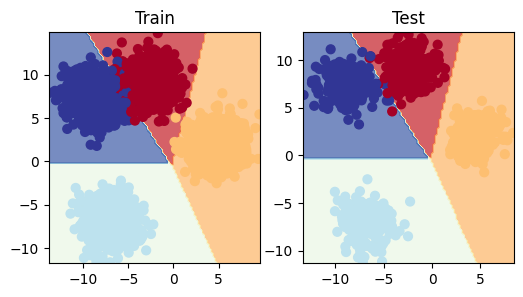

In [ ]:
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_4, X_train, y_train)
plt.title('Train')

plt.subplot(1, 2, 2)
plot_decision_boundary(model_4, X_test, y_test)
plt.title('Test')


In [ ]:
!pip install torchmetrics

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_preds = model_4(X_test)

y_preds = torch.softmax(y_preds, dim=1).argmax(1)

In [ ]:
from torchmetrics import Accuracy

torchmetric_acc = Accuracy(task='multiclass', num_classes=4).to(device)
torchmetric_acc(y_preds, y_test)

tensor(0.9937)

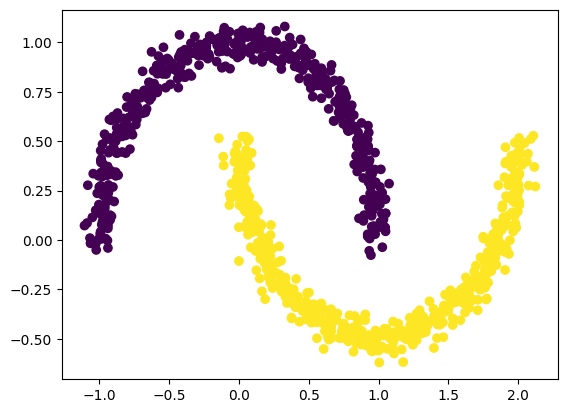

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(1000, random_state=42, noise = 0.05)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [ ]:
X[:3], y[:3]

(tensor([[-0.0214,  0.4062],
         [ 0.9767, -0.4583],
         [ 0.9041, -0.3765]]),
 tensor([1., 1., 1.]))

In [ ]:
X, y = torch.from_numpy(X).type(torch.float), torch.from_numpy(y).type(torch.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
class MoonClassification(nn.Module):
  def __init__(self, in_features, out_features, hidden):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(in_features= in_features, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden, out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features= hidden, out_features=out_features),
    )

  def forward(self, x):
    return self.layers(x)

model_m = MoonClassification(2, 1, 5)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_m.parameters(), lr=0.1)

In [ ]:
acc_fn = Accuracy(task='binary')

In [ ]:
epochs = 1000

for epoch in range(epochs):
  model_m.train()
  pred = model_m(X_train)
  loss = loss_fn(pred, y_train.unsqueeze(1))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Acc Train: {acc_fn(torch.sigmoid(pred).round().squeeze(), y_train):.3f} | loss train: {loss * 100:.3f}', end=' ')
    model_m.eval()
    with torch.inference_mode():
      pred = model_m(X_test)
      loss = loss_fn(pred, y_test.unsqueeze(1))

    print(f'Acc Test: {acc_fn(torch.sigmoid(pred).round().squeeze(), y_test):.3f} | Loss test: {loss * 100:.3f}')


Epoch: 0 | Acc Train: 0.500 | loss train: 72.617 Acc Test: 0.500 | Loss test: 72.351
Epoch: 100 | Acc Train: 0.781 | loss train: 62.065 Acc Test: 0.715 | Loss test: 62.395
Epoch: 200 | Acc Train: 0.866 | loss train: 29.813 Acc Test: 0.860 | Loss test: 30.564
Epoch: 300 | Acc Train: 0.906 | loss train: 21.365 Acc Test: 0.915 | Loss test: 20.917
Epoch: 400 | Acc Train: 0.924 | loss train: 18.008 Acc Test: 0.920 | Loss test: 17.395
Epoch: 500 | Acc Train: 0.945 | loss train: 14.050 Acc Test: 0.950 | Loss test: 13.287
Epoch: 600 | Acc Train: 0.966 | loss train: 9.724 Acc Test: 0.980 | Loss test: 8.879
Epoch: 700 | Acc Train: 0.990 | loss train: 6.278 Acc Test: 0.995 | Loss test: 5.613
Epoch: 800 | Acc Train: 0.995 | loss train: 4.164 Acc Test: 0.995 | Loss test: 3.661
Epoch: 900 | Acc Train: 0.999 | loss train: 2.940 Acc Test: 1.000 | Loss test: 2.536


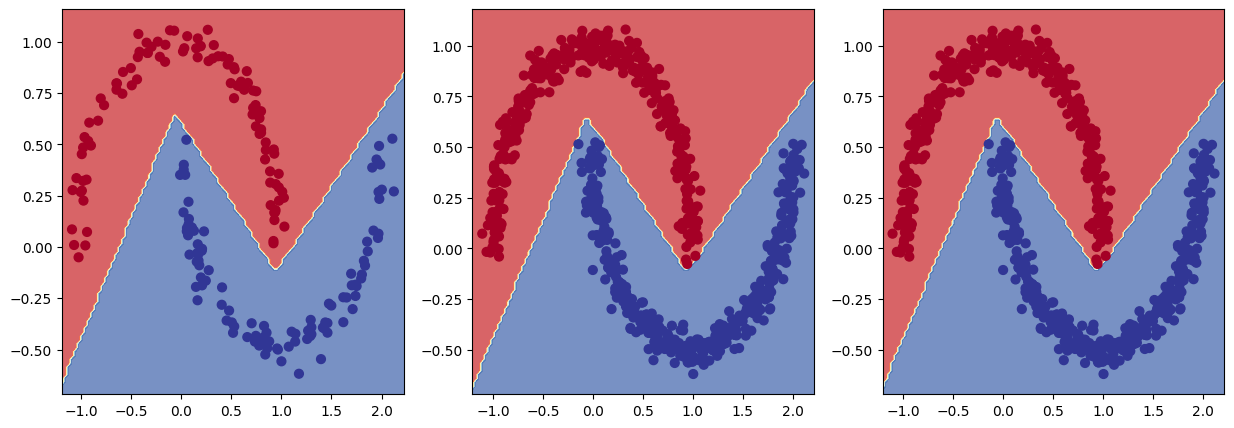

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plot_decision_boundary(model_m, X_test, y_test)

plt.subplot(1, 3, 2)
plot_decision_boundary(model_m, X_train, y_train)

plt.subplot(1, 3, 3)
plot_decision_boundary(model_m, X_train, y_train)

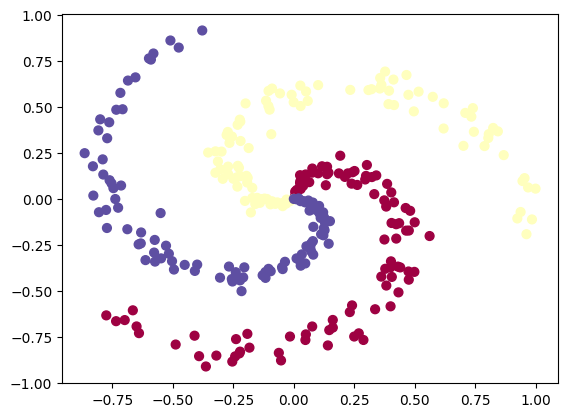

In [ ]:
import numpy as np
N = 100
D = 2
K = 3

X = np.zeros((N * K, D))
y = np.zeros(N * K, dtype = 'uint8')

for j in range(K):
  ix = range(N * j, N*(j + 1))
  r = np.linspace(0.0, 1, N)
  t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2
  X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
  y[ix] = j

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()